In [142]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [143]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ews_analysis import hopf_helper as hh
from ews_helper import get_ews, itoEulerMaruyama


In [144]:
"""
x_dot = rx - x^3
r_dot = epsilon
"""
r0 = -10
x0 = 0
epsilon = 0.05
sigma = 0.6 # noise

t_span, t_points= 410, 50000 
time = np.linspace(-200, t_span, t_points)
dt = t_span/t_points

ews_win_size = t_points // 20
ews_offset = ews_win_size // 3

In [145]:
# Pitchfork bifurcation model

def dSdt(t, S, epsilon):
    """
        x_dot = rx - x^3
        r_dot = epsilon
    """
    x, r = S
    try:
        shaper = np.ones_like(r)
    except:
        try:
            shaper = np.ones(len(r))
        except:
            shaper = 1

    return [
        r*x - x**3,
        epsilon * shaper
    ]

In [146]:
# Euler Maruyama
results,derivatives = itoEulerMaruyama(
    model=dSdt,
    y0=[x0, r0],
    time=time,
    noise=[sigma,0],args=(epsilon,),save_derivative=True
)

slope,intercept,_,_,_ = linregress(time, results[:,0])
# mu=0=intercept+slope*t iff t=-intercept/slope
t_star = time[np.where(results[:,1] >= 1)[0][0]]

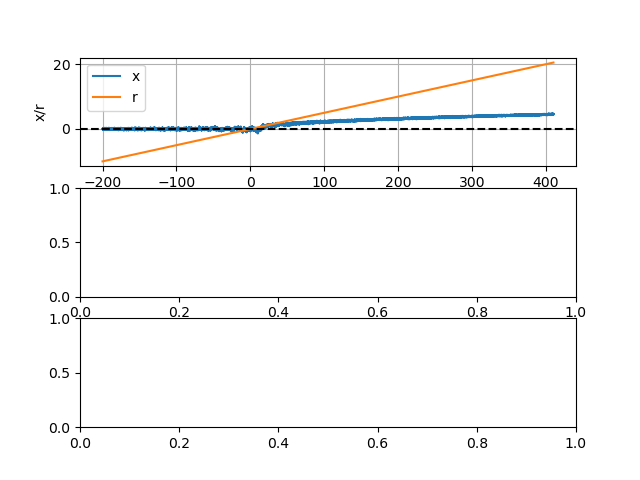

In [147]:
fig, axes = plt.subplots(3,1)

ax = axes[0]
ax.plot(time, results[:,0], label='x')
ax.plot(time, results[:,1], label='r')
ax.axhline(y=0, color='black', ls='--')
ax.set_xlabel('time')
ax.set_ylabel('x/r')
ax.grid()
ax.legend()

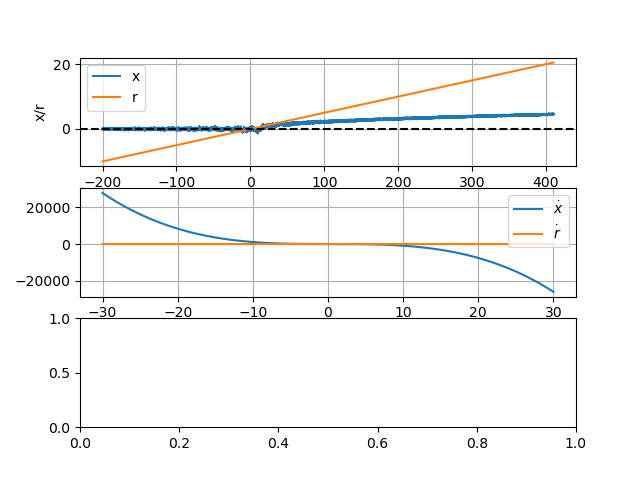

In [148]:
xx = np.linspace(-30, 30, 100000)
X_dot, R_dot = dSdt(time,[xx,xx], epsilon)

ax = axes[1] 

ax.plot(xx, X_dot, label=r'$\dot{x}$')
ax.plot(xx, R_dot, label=r'$\dot{r}$')
ax.legend()
ax.grid()
ax.set_xlabel('x')

plt.show()


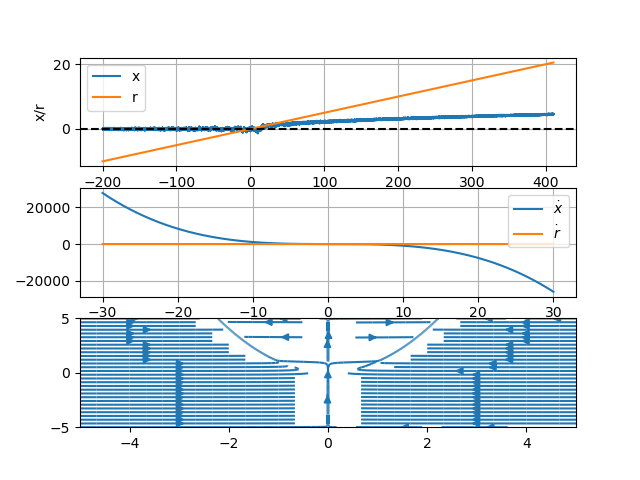

In [149]:
ax = axes[2] 
w = 5
Y, X = np.mgrid[-w:w:1000j, -w:w:1000j]
U, V = dSdt(time,[X,Y], epsilon)
stream = ax.streamplot(X, Y, U, V, density = 1)
ax.set_ylim([-1*w, w])
ax.set_xlim([-1*w, w])

plt.show()

In [162]:
ttl = r"""Supercritical Pitchfork Bifurcation: $\dot{r}$ = rx - $x^3$"""
ttl = ttl + "\n" + f""" [x_0, r_0]=[{r0}, {x0}], dt={dt}[Sec]"""

fig.suptitle(ttl, fontsize=10)
plt.show()

AttributeError: 'Figure' object has no attribute 'title'

In [160]:
ews_win_size = 13
ews_offset = 3
block_idxs, ar1s, decays, vars = get_ews(
    time, results[:,0], win_size=ews_win_size, offset=ews_offset
)

100%|██████████| 16663/16663 [00:04<00:00, 3749.71it/s]


Text(0.5, 0.98, 'EWS For Super Critical Hopf Bifurcation\nwindow size=13, offset=3')

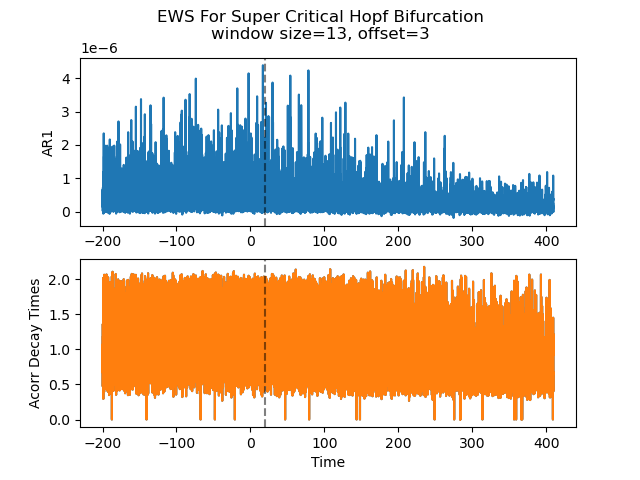

In [161]:
fig, axs = plt.subplots(2,1)
ax0, ax1 = axs
ax0.set_ylabel('AR1')
ax1.set_ylabel('Acorr Decay Times')
ax1.sharex(ax0)
ax1.set_xlabel('Time')

axs[0].plot(time[block_idxs[:len(ar1s)]], ar1s, label=f'ar1')
axs[0].axvline(
    t_star, color='k', linestyle='--', 
    alpha=0.5, label='x=0'
)

# Plot Decays
axs[1].plot(time[block_idxs[:len(decays)]], decays, label=f'No Noise')
axs[1].plot(time[block_idxs[:len(decays)]], decays, label=f'With Noise')
axs[1].axvline(
    t_star, color='k', linestyle='--', 
    alpha=0.5, label='x=0'
)

ttl = f'EWS For Super Critical Hopf Bifurcation'
ttl += f'\n'+ f'window size={ews_win_size}, offset={ews_offset}'
fig.suptitle(ttl)


In [159]:
for i, t in enumerate(time[:-1]):
    print(f'{time[i+1] - time[i]:2f}')
         

0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0.012200
0